# Sandbox for testing purposes

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.linalg import block_diag

from cereeberus import EmbeddedGraph, ReebGraph
import cereeberus.data.ex_mappergraphs as ex_mg
# from cereeberus.data.ex_mergetrees import randomMergeTree

from cereeberus.dist.interleave import Interleave

In [2]:

M_1 = ex_mg.dancing_man(delta = 1)
M_2 = ex_mg.torus(delta = 1)
M_2.f[5] = 7
M_2.set_pos_from_f()


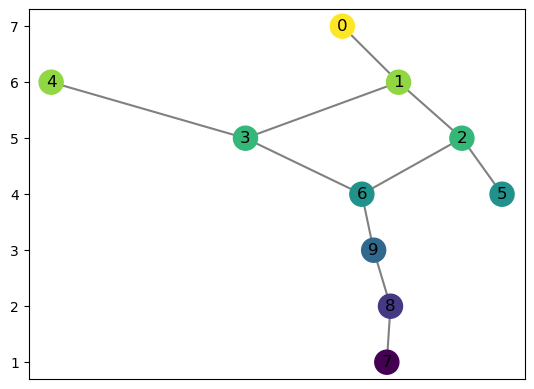

In [3]:
M_1.draw()

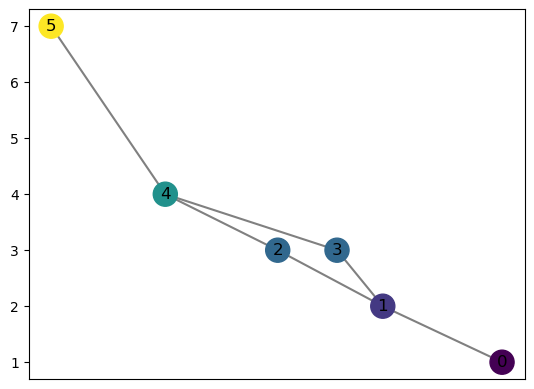

In [4]:
M_2.draw()

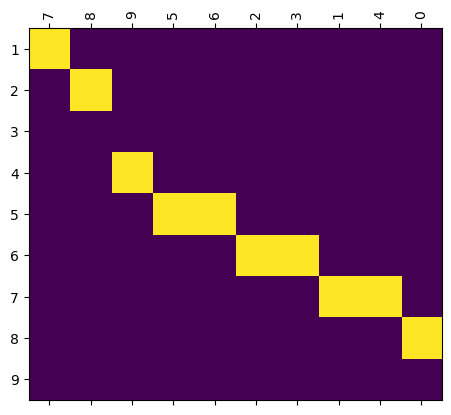

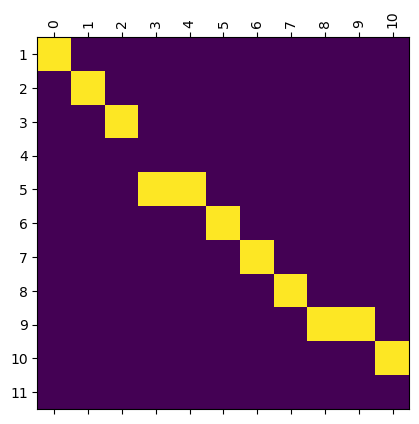

In [8]:
myInt = Interleave(M_1, M_2)

for eps in ['0','n']:
    myInt.draw_matrix(myInt.I['F'][eps])

0 8
[[1.]]
[[1.]]
[[1.]
 [0.]]
[[1. 1.]]
[[1.]]
[[1.]]
[[1.]]
[[1. 1.]]
[[1.]
 [0.]]


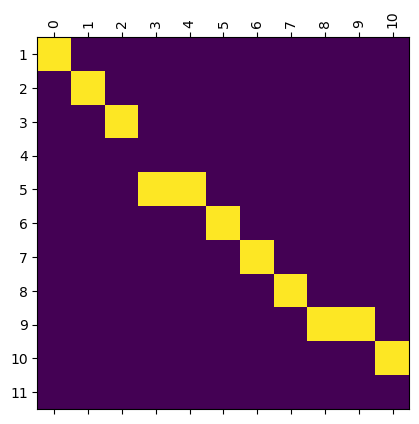

In [10]:
myInt.draw_matrix(myInt.I['F']['n'])

In [11]:
myInt.block_dict_to_matrix(myInt.I['F']['0'])

1 7
[[1.]]
[[1.]]
[[0.]
 [1.]]
[[1. 1.]]
[[1. 1.]]
[[1. 1.]]
[[1.]
 [0.]]


{'rows': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'cols': [7, 8, 9, 5, 6, 2, 3, 1, 4, 0],
 'array': array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])}

In [14]:
myInt.I['F']['0']

{7: {'rows': [8, 9],
  'cols': [0],
  'array': array([[1.],
         [0.]])},
 6: {'rows': [7], 'cols': [1, 4], 'array': array([[1., 1.]])},
 5: {'rows': [6], 'cols': [2, 3], 'array': array([[1., 1.]])},
 4: {'rows': [5], 'cols': [5, 6], 'array': array([[1., 1.]])},
 1: {'rows': [1], 'cols': [7], 'array': array([[1.]])},
 2: {'rows': [2], 'cols': [8], 'array': array([[1.]])},
 3: {'rows': [3, 4],
  'cols': [9],
  'array': array([[0.],
         [1.]])}}

In [35]:
Blocks = myInt.I['F']['0']

a = np.min(list(Blocks.keys()) )
b = np.max(list(Blocks.keys()) )
print(a,b)

rows = [Blocks[i]['rows'] for i in range(a, b+1)]
rows = sum(rows, []) # flatten the list
cols = [Blocks[i]['cols'] for i in range(a, b+1)]
cols = sum(cols, []) # flatten the list

arrays = [ Blocks[i]['array'] for i in range(a, b+1)]

for i in range(len(arrays)):
    print(arrays[i])

BigMatrix = block_diag(*arrays)
print(BigMatrix)

1 7
[[1.]]
[[1.]]
[[0.]
 [1.]]
[[1. 1.]]
[[1. 1.]]
[[1. 1.]]
[[1.]
 [0.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [9]:
n = myInt.n
F = myInt.F['0']
F_n, I_0 = F.smoothing(n, return_map = True)

In [10]:
I_0

{7: 1, 8: 2, 9: 4, 5: 5, 6: 5, 2: 6, 3: 6, 1: 7, 4: 7, 0: 8}

In [11]:
F_val_to_verts = myInt.F['0'].func_to_vertex_dict()
Fn_val_to_verts = myInt.F['n'].func_to_vertex_dict()

In [12]:
myInt.map_dict_to_matrix(I_0, Fn_val_to_verts, F_val_to_verts)

{7: {'rows': [8, 9],
  'cols': [0],
  'array': array([[1.],
         [0.]])},
 6: {'rows': [7], 'cols': [1, 4], 'array': array([[1., 1.]])},
 5: {'rows': [6], 'cols': [2, 3], 'array': array([[1., 1.]])},
 4: {'rows': [5], 'cols': [5, 6], 'array': array([[1., 1.]])},
 1: {'rows': [1], 'cols': [7], 'array': array([[1.]])},
 2: {'rows': [2], 'cols': [8], 'array': array([[1.]])},
 3: {'rows': [3, 4],
  'cols': [9],
  'array': array([[0.],
         [1.]])}}

In [28]:
myInt.phi_V

{7: {'rows': [7], 'cols': [0], 'array': array([[0.]])},
 6: {'rows': [6], 'cols': [1, 4], 'array': array([[0., 0.]])},
 5: {'rows': [5], 'cols': [2, 3], 'array': array([[0., 0.]])},
 4: {'rows': [4], 'cols': [5, 6], 'array': array([[0., 0.]])},
 1: {'rows': [1], 'cols': [7], 'array': array([[0.]])},
 2: {'rows': [2], 'cols': [8], 'array': array([[0.]])},
 3: {'rows': [3], 'cols': [9], 'array': array([[0.]])}}

In [6]:
myInt.I

{'F': {'0': {7: 1, 8: 2, 9: 4, 5: 5, 6: 5, 2: 6, 3: 6, 1: 7, 4: 7, 0: 8},
  'n': {0: 1, 1: 2, 2: 3, 3: 5, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 9, 10: 10}},
 'G': {'0': {0: 1, 1: 2, 2: 3, 3: 3, 4: 4, 5: 7},
  'n': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9}}}

In [17]:
F_val_to_verts = myInt.F['0'].func_to_vertex_dict()

In [18]:
Fn_val_to_verts = myInt.F['n'].func_to_vertex_dict()

In [14]:
F = myInt.F['0']
n = 1
F_n, I_0 = F.smoothing(n, return_map = True)

In [15]:
I_0

{7: 1, 8: 2, 9: 4, 5: 5, 6: 5, 2: 6, 3: 6, 1: 7, 4: 7, 0: 8}

In [41]:
I = {}
for i in F_val_to_verts:
    # i is the function value of the vertices 
    matrix_dict = {}
    matrix_dict['rows'] = Fn_val_to_verts[i]
    matrix_dict['cols'] = F_val_to_verts[i]
    matrix_dict['array'] = np.zeros((len(Fn_val_to_verts[i]), len(F_val_to_verts[i])))
    for col_i, vert in enumerate(matrix_dict['cols']):
            row_j = matrix_dict['rows'].index(I_0[vert])
            matrix_dict['array'][row_j, col_i] = 1
    I[i] = matrix_dict

for i in I.keys():
      print(f"Function value {i}")
      print(f"Cols: {I[i]['cols']}")
      print(I[i]['array'])
      print(f"Rows: {I[i]['rows']}\n")

Function value 7
Cols: [0]
[[1.]
 [0.]]
Rows: [8, 9]

Function value 6
Cols: [1, 4]
[[1. 1.]]
Rows: [7]

Function value 5
Cols: [2, 3]
[[1. 1.]]
Rows: [6]

Function value 4
Cols: [5, 6]
[[1. 1.]]
Rows: [5]

Function value 1
Cols: [7]
[[1.]]
Rows: [1]

Function value 2
Cols: [8]
[[1.]]
Rows: [2]

Function value 3
Cols: [9]
[[0.]
 [1.]]
Rows: [3, 4]



In [42]:
I_0[9]

4